In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
#from tensorflow.keras import sklearn


from keras.layers import Conv2D, MaxPooling2D, Activation, Embedding, Dense, Dropout, Flatten, Input,GlobalAveragePooling2D
from keras import activations
#from keras.optimizers import Adam, SGD
from keras.layers import LSTM
from skimage.color import gray2rgb

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules

import sys
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from glob import glob

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'/content/drive/MyDrive/Datasets/BdSL Standard Dataset (Ragib Nihal)/Train'
valid_path = r'/content/drive/MyDrive/Datasets/BdSL Standard Dataset (Ragib Nihal)/Test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob(r'/content/drive/MyDrive/Datasets/BdSL Standard Dataset (Ragib Nihal)/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=2000,
    decay_rate=0.16,
    staircase=True)

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create generator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/Datasets/BdSL Standard Dataset (Ragib Nihal)/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 80,
                                                 class_mode = 'categorical')

Found 21338 images belonging to 37 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/Datasets/BdSL Standard Dataset (Ragib Nihal)/Test',
                                            target_size = (224, 224),
                                            batch_size = 80,
                                            class_mode = 'categorical')

Found 12813 images belonging to 37 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
267/267 [==============================] - 8804s 33s/step - loss: 2.4781 - accuracy: 0.3319 - val_loss: 1.7357 - val_accuracy: 0.5142
Epoch 2/10
267/267 [==============================] - 579s 2s/step - loss: 1.4924 - accuracy: 0.5817 - val_loss: 1.3120 - val_accuracy: 0.6305
Epoch 3/10
267/267 [==============================] - 582s 2s/step - loss: 1.1944 - accuracy: 0.6665 - val_loss: 1.1270 - val_accuracy: 0.6809
Epoch 4/10
267/267 [==============================] - 578s 2s/step - loss: 1.0357 - accuracy: 0.7103 - val_loss: 1.0216 - val_accuracy: 0.7069
Epoch 5/10
267/267 [==============================] - 574s 2s/step - loss: 0.9134 - accuracy: 0.7471 - val_loss: 0.9127 - val_accuracy: 0.7431
Epoch 6/10
267/267 [==============================] - 578s 2s/step - loss: 0.8425 - accuracy: 0.7661 - val_loss: 0.8664 - val_accuracy: 0.7563
Epoch 7/10
267/267 [==============================] - 578s 2s/step - loss: 0.7782 - accuracy: 0.7817 - val_loss: 0.8076 - val_accuracy: 0.77

In [ ]:
import matplotlib.pyplot as plt

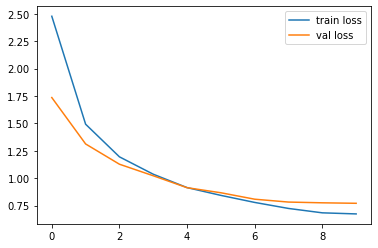

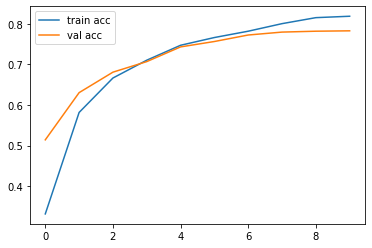

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')